<a href="https://colab.research.google.com/github/AditiSatsangi/Miscellaneous-Projects/blob/main/flowers_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

## Import TensorFlow and Keras Layers

In [ ]:
#import packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

The dataset we downloaded contains images of 5 types of flowers:

Rose

Daisy

Dandelion

Sunflowers

Tulips


In [ ]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

The code below creates a train and a val folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set.

In [ ]:
import os
import glob
import shutil
import random

base_dir = '/root/.keras/datasets/flower_photos'
classes = os.listdir(base_dir)

for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))

    random.shuffle(images)  # Shuffle the images before splitting

    num_train = int(round(len(images) * 0.8))
    train, val = images[:num_train], images[num_train:]

    for t in train:
        dest_dir = os.path.join(base_dir, 'train', cl)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        dest_file = os.path.join(dest_dir, os.path.basename(t))
        if not os.path.exists(dest_file):
            shutil.move(t, dest_file)

    for v in val:
        dest_dir = os.path.join(base_dir, 'val', cl)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)
        dest_file = os.path.join(dest_dir, os.path.basename(v))
        if not os.path.exists(dest_file):
            shutil.move(v, dest_file)


tulips: 799 Images
val: 0 Images
sunflowers: 699 Images
roses: 641 Images
train: 0 Images
daisy: 633 Images
LICENSE.txt: 0 Images
dandelion: 898 Images


In [ ]:
round(len(images)*0.8)

718

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val') #validation set

# Data Augmentation

## Set Batch and Image Size

In [ ]:
batch_size =100
IMG_SHAPE =(150)

## Apply Random Horizontal Flip

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))



Found 3650 images belonging to 5 classes.


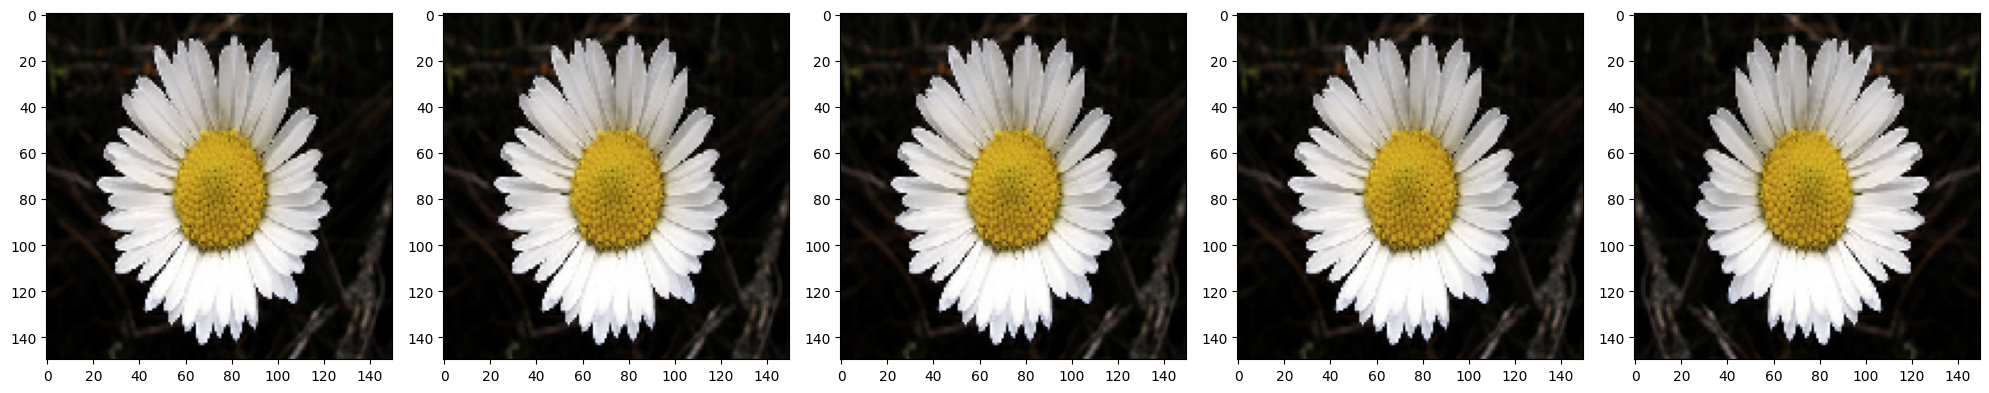

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Apply Random Rotation

In [ ]:
image_gen = ImageDataGenerator(rescale= 1./255 , rotation_range= 45)
train_data_gen = image_gen.flow_from_directory(batch_size= batch_size,
                                               directory=train_dir,
                                               shuffle= True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 3650 images belonging to 5 classes.


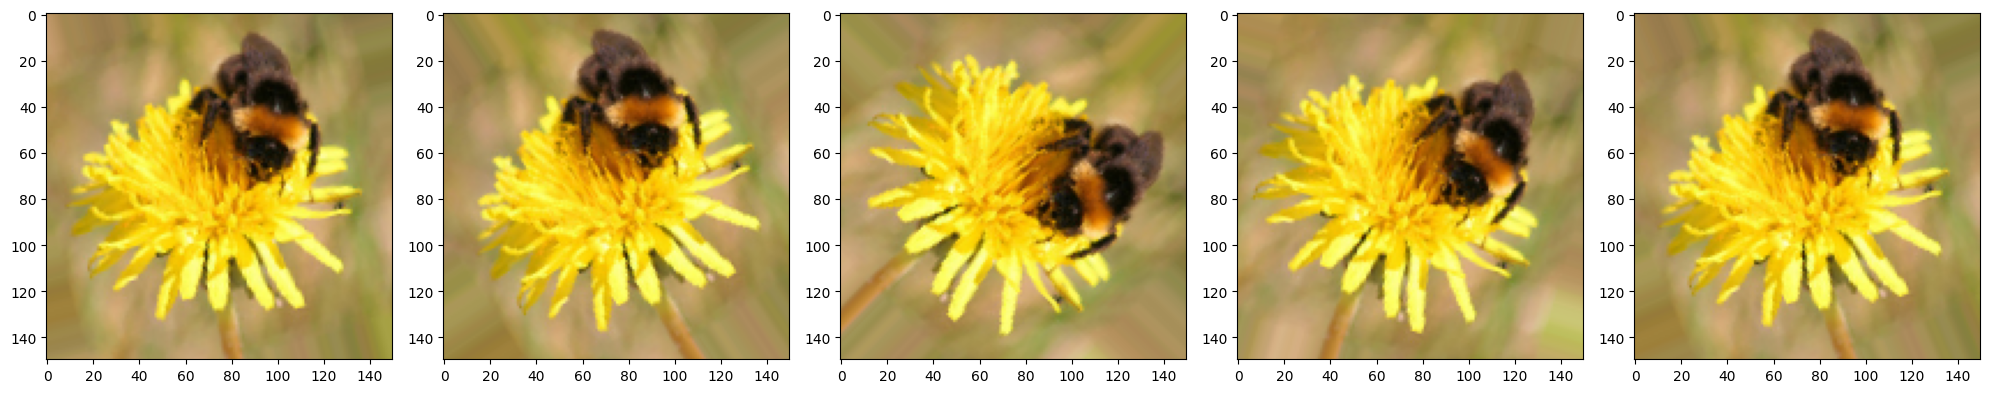

In [ ]:
# take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Apply Random Zoom

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3650 images belonging to 5 classes.


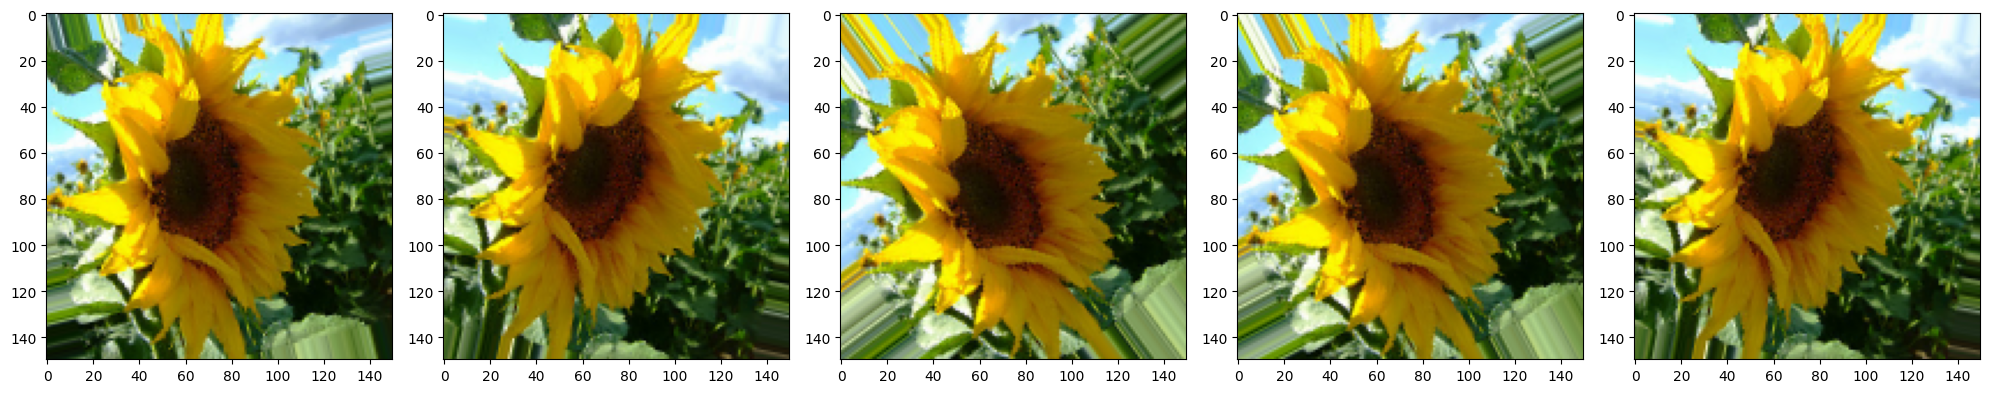

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

random 45 degree rotation,
random zoom of up to 50%,
random horizontal flip,
width shift of 0.15,
height shift of 0.15.

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(    batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 3650 images belonging to 5 classes.


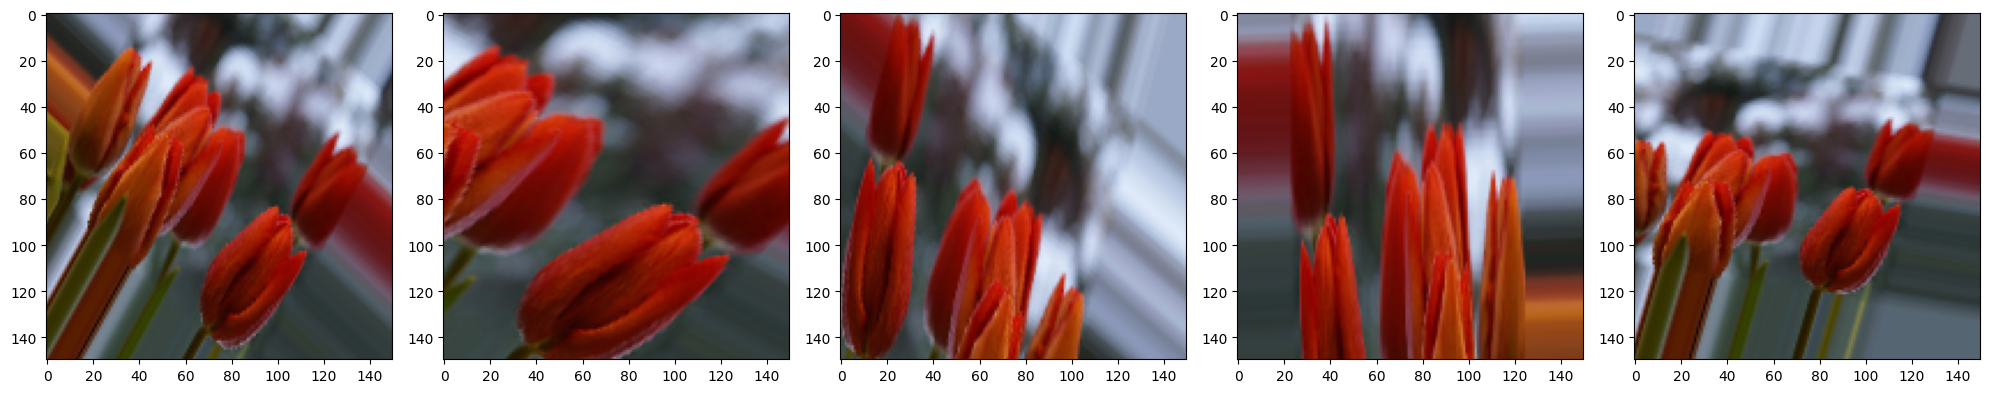

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Create a Data Generator for the Validation Set

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 1812 images belonging to 5 classes.


# Create the CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

# Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

In [43]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

<ipython-input-43-7fa7f550ff06>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/80
37/37 [==============================] - 180s 5s/step - loss: 1.5827 - accuracy: 0.2934 - val_loss: 1.4561 - val_accuracy: 0.4056
Epoch 2/80
37/37 [==============================] - 155s 4s/step - loss: 1.1434 - accuracy: 0.5290 - val_loss: 1.1448 - val_accuracy: 0.5635
Epoch 3/80
37/37 [==============================] - 175s 5s/step - loss: 1.0123 - accuracy: 0.6000 - val_loss: 1.0145 - val_accuracy: 0.6164
Epoch 4/80
37/37 [==============================] - 158s 4s/step - loss: 0.9507 - accuracy: 0.6351 - val_loss: 0.9571 - val_accuracy: 0.6242
Epoch 5/80
37/37 [==============================] - 176s 5s/step - loss: 0.9214 - accuracy: 0.6419 - val_loss: 0.8378 - val_accuracy: 0.6705
Epoch 6/80
37/37 [==============================] - 156s 4s/step - loss: 0.8804 - accuracy: 0.6586 - val_loss: 0.8260 - val_accuracy: 0.6755
Epoch 7/80
37/37 [==============================] - 167s 4s/step - loss: 0.8596 - accuracy: 0.6614 - val_loss: 0.7998 - val_accuracy: 0.6865
Epoch 8/80
37

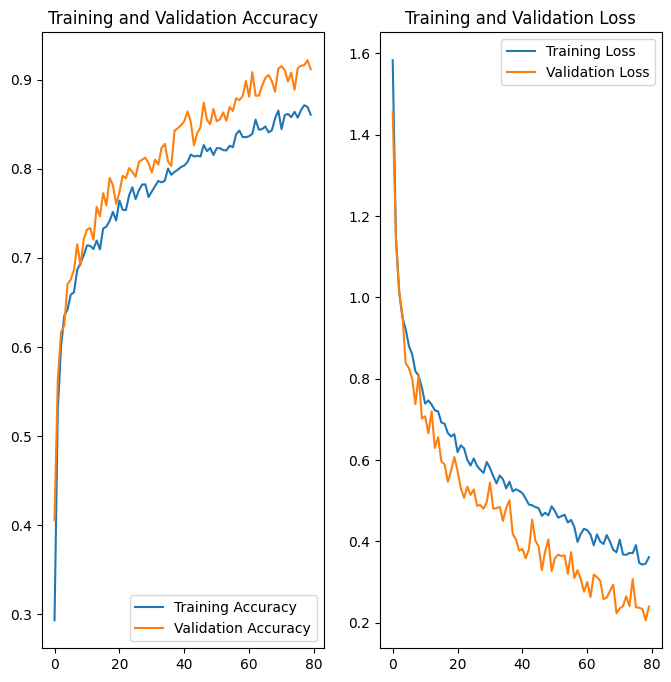

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()